In [41]:
import numpy as np
import matplotlib.pyplot as plt

import dsphsim.tactician
import dsphsim.simulator
import dsphsim.instruments
import dsphsim.dwarf
from astropy import table
from start_plot import *

%matplotlib inline

In [73]:
mw = table.Table.read('/Users/astrolab/Dropbox/LSST/mwish_tabs/mwish_2.ecsv',format = 'ascii.ecsv')
mw = mw[mw['Mstar'] < 1e6] # only consider low mass dwarfs, Mstar < 1e6 Msun

dwarf0 = dsphsim.dwarf.Dwarf(age = 12.0, metallicity = 2e-4)
unit_stellar_mass = dwarf0.isochrone.stellar_mass()
#print 'index, distance module, stellar mass, number of star'

num = np.zeros_like(mw['Mstar'])
depth = 26 # assuming the depth for LSST is 26
for i in range(1, len(num)):
    distance = mw[i]['distance'] # in kpc
    stellar_mass = mw[i]['Mstar'] # in Msun
        
    dm = 5*np.log10(distance*1000)-5
    
    dwarf = dsphsim.dwarf.Dwarf(distance_modulus = dm, \
                                age = 12.0, metallicity = 2e-4, \
                                richness = stellar_mass/unit_stellar_mass)
    #note metallcity is Z here, not [Fe/H], age in Gyr
    
    mag_1, mag_2, lon, lat, vel = dwarf.simulate()
    mags = mag_1
    num[i] = len(mags[mags < depth])
    #print i, distance, stellar_mass,num[i]

idx = num > 100 # assume the dwarf is detectable 
                # if more than 100 stars above the limiting magnitude
idx2 = num < 100


num2 = np.zeros_like(mw['Mstar'])
depth2 = 23 # assuming the depth for DES is 23
for i in range(1, len(num)):
    distance = mw[i]['distance'] # in kpc
    stellar_mass = mw[i]['Mstar'] # in Msun
        
    dm = 5*np.log10(distance*1000)-5
    
    dwarf = dsphsim.dwarf.Dwarf(distance_modulus = dm, \
                                age = 12.0, metallicity = 2e-4, \
                                richness = stellar_mass/unit_stellar_mass)
    #note metallcity is Z here, not [Fe/H], age in Gyr
    
    mag_1, mag_2, lon, lat, vel = dwarf.simulate()
    mags = mag_1
    num2[i] = len(mags[mags < depth2])
    #print i, distance, stellar_mass,num[i]

idx3 = num2 > 100 # assume the dwarf is detectable 
                # if more than 100 stars above the limiting magnitude
idx4 = num2 < 100


total number of dwarfs < 10^6 Msun : 315
# of LSST detectable dwarfs < 10^6 Msun : 130
# of DES detectable dwarfs < 10^6 Msun : 43


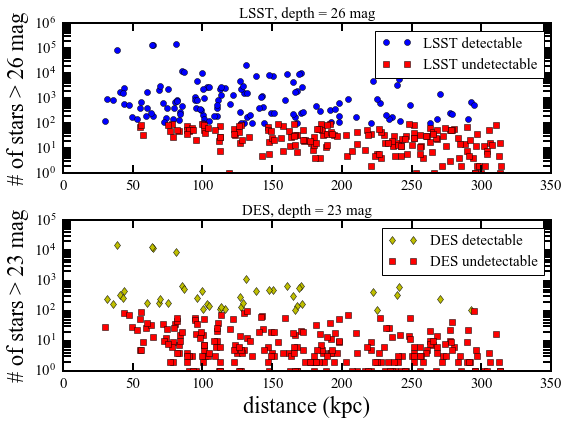

In [88]:
plt.figure(figsize=[8,6])
print 'total number of dwarfs < 10^6 Msun : %i' %len(num) 
print '# of LSST detectable dwarfs < 10^6 Msun : %i' %len(num[idx])
print '# of DES detectable dwarfs < 10^6 Msun : %i' %len(num2[idx3]) 

plt.subplot(2,1,1)
plt.plot(mw['distance'][idx], num[idx],'o', label='LSST detectable')
plt.plot(mw['distance'][idx2], num[idx2],'rs', label='LSST undetectable')
plt.gca().set_yscale("log")
plt.ylabel('# of stars > '+str(depth)+' mag')
plt.title('LSST, depth = 26 mag')
plt.legend()

plt.subplot(2,1,2)
plt.plot(mw['distance'][idx3], num2[idx3],'yd', label='DES detectable')
plt.plot(mw['distance'][idx4], num2[idx4],'rs', label='DES undetectable')
plt.gca().set_yscale("log")
plt.xlabel('distance (kpc)')
plt.ylabel('# of stars > '+str(depth2)+' mag')
plt.title('DES, depth = 23 mag')
plt.legend()

plt.tight_layout()
plt.show()

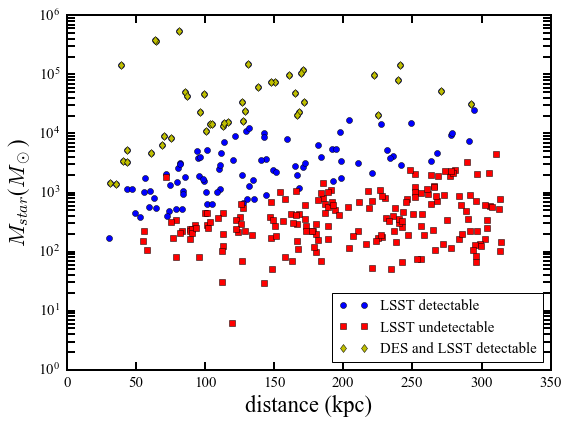

In [89]:
plt.figure(figsize=[8,6])
plt.plot(mw['distance'][idx], mw['Mstar'][idx],'o', label='LSST detectable')
plt.plot(mw['distance'][idx2], mw['Mstar'][idx2],'rs', label='LSST undetectable')
plt.plot(mw['distance'][idx3], mw['Mstar'][idx3],'yd', label= 'DES and LSST detectable')
plt.gca().set_yscale("log")
plt.xlabel('distance (kpc)')
plt.ylabel('$M_{star}$($M_\odot$)')
plt.legend(loc=4)
plt.tight_layout()
plt.show()

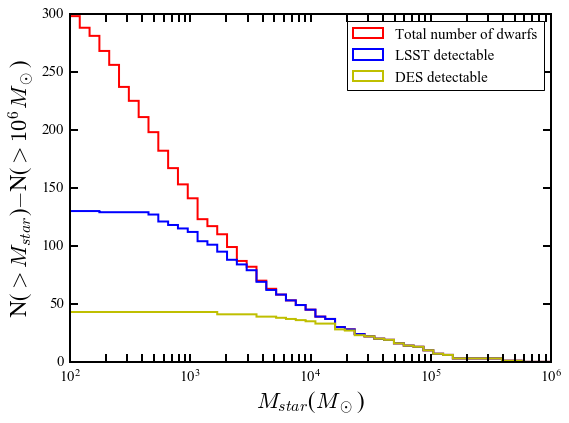

In [87]:
plt.figure(figsize=[8,6])
plt.hist(mw['Mstar'],bins=np.logspace(2, 6, 50), cumulative=-1,histtype='step',color='r',lw=2,label='Total number of dwarfs')
plt.hist(mw['Mstar'][idx],bins=np.logspace(2, 6, 50), cumulative=-1,histtype='step',color='b',lw=2, label='LSST detectable')
plt.hist(mw['Mstar'][idx3],bins=np.logspace(2, 6, 50), cumulative=-1,histtype='step',color='y',lw=2, label='DES detectable')

plt.gca().set_xscale("log")
plt.xlabel('$M_{star}$($M_\odot$)')
plt.ylabel('N($>M_{star}$)$-$N($>10^6M_\odot$)')
plt.legend()
plt.tight_layout()
plt.show()